# FCC Book Recommendation K-NN (ML with Python Project)

## Project Summary

In [1]:
# In this challenge, you will create a book recommendation algorithm using 
#K-Nearest Neighbors.

# You will use the Book-Crossings dataset. This dataset contains 1.1 million 
#ratings (scale of 1-10) of 270,000 books by 90,000 users.

# The first three cells import libraries you may need and the data to use. The final cell is 
#for testing. Write all your code in between those cells.

## 1. Import Libraries

In [2]:
# 1. import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

## 2. Get Data Files

In [3]:
# 2. get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2022-12-20 14:54:03--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.1’

book-crossings.zip. 100%[===================>]  24.88M  32.1MB/s    in 0.8s    

2022-12-20 14:54:05 (32.1 MB/s) - ‘book-crossings.zip.1’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## 3. Import CSV Data Into Dataframes

In [4]:
# 3. import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [5]:
# ... INSERT YOUR CODE BELOW ...

## Get To Know Your Dataset

### Basic Info: ```df_books```

#### Information

In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271378 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [7]:
df_books.describe()

,isbn,title,author
count,271379,271379,271378
unique,271379,242154,102042
top,0195153448,Selected Poems,Agatha Christie
freq,1,27,632


In [8]:
df_books.head(3)

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este


In [9]:
df_books.tail(3)

,isbn,title,author
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle


In [10]:
df_books.shape # (271_379, 3)

(271379, 3)

In [11]:
df_books.shape[0] # 271_379

271379

In [12]:
df_books.ndim # 2

2

In [13]:
df_books.size # 814_137

814137

In [14]:
df_books.index # RangeIndex(start=0, stop=271379, step=1)

RangeIndex(start=0, stop=271379, step=1)

In [15]:
df_books.columns # Index(['isbn', 'title', 'author'], dtype='object')

Index(['isbn', 'title', 'author'], dtype='object')

In [16]:
df_books.isna().sum() # isbn 0, title 0, author 1

isbn      0
title     0
author    1
dtype: int64

In [17]:
df_books.notna().sum()

isbn      271379
title     271379
author    271378
dtype: int64

#### Plot

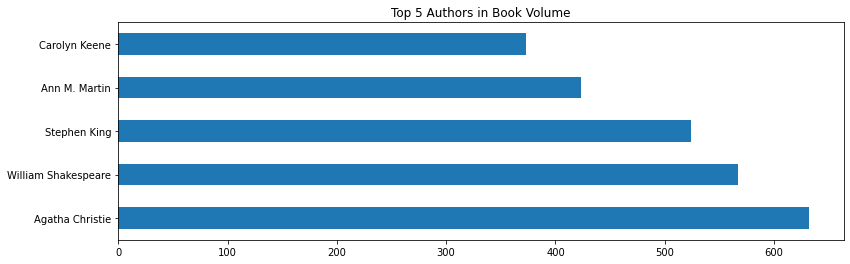

In [18]:
# Top 5 Authors in Number of Books
df_books['author'].value_counts().head(5).plot(kind='barh', figsize=(13,4), title='Top 5 Authors in Book Volume')

### Basic Info: ```df_ratings```

#### Information

In [19]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB


In [20]:
df_ratings.describe()

,user,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [21]:
df_ratings.head(3)

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0


In [22]:
df_ratings.tail(3)

,user,isbn,rating
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0
1149779,276723,05162443314,8.0


In [23]:
df_ratings.shape # (1_149_780, 3)

(1149780, 3)

In [24]:
df_ratings.shape[0] # 1_149_780

1149780

In [25]:
df_ratings.ndim # 2

2

In [26]:
df_ratings.size # 3_449_340

3449340

In [27]:
df_ratings.index # RangeIndex(start=0, stop=1149780, step=1)

RangeIndex(start=0, stop=1149780, step=1)

In [28]:
df_ratings.columns # Index(['user', 'isbn', 'rating'], dtype='object')

Index(['user', 'isbn', 'rating'], dtype='object')

In [29]:
df_ratings.isna().sum() # user 0, isbn 0, rating 0

user      0
isbn      0
rating    0
dtype: int64

In [30]:
df_ratings.notna().sum()

user      1149780
isbn      1149780
rating    1149780
dtype: int64

In [31]:
# How many unique users, books and ratings?
print("{} unique users".format(df_ratings.user.value_counts().count())) # 105283 unique users
print("{} unique books".format(df_ratings.isbn.value_counts().count())) # 340556 unique books
print("{} unique ratings".format(df_ratings.rating.value_counts().count())) # 11 unique ratings (0-10)

105283 unique users
340556 unique books
11 unique ratings


#### Plot

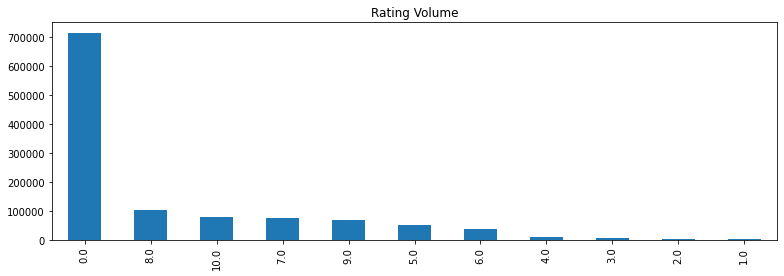

In [32]:
# Rating Volume
df_ratings['rating'].value_counts().plot(kind='bar', figsize=(13,4), title='Rating Volume')

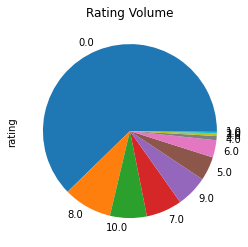

In [33]:
df_ratings['rating'].value_counts().plot(kind='pie', figsize=(13,4), title='Rating Volume')

In [34]:
mask1 = df_ratings['rating'] > 0

#plt.figure(figsize=(14,6))
#x = df_ratings['rating']
#y = df_ratings['user']
#plt.plot(x, y)

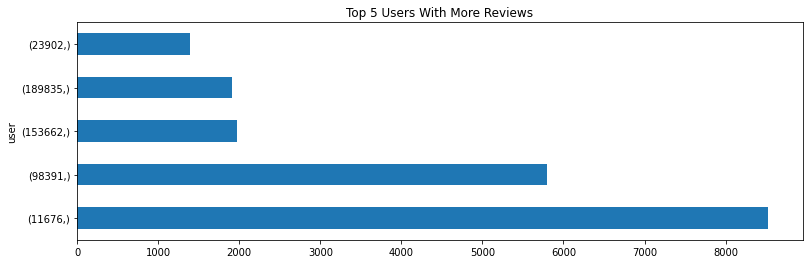

In [35]:
# top 5 users with more reviews
df_ratings.loc[mask1, ['user']].value_counts().head(5).plot(kind='barh', figsize=(13,4), title='top 5 users with more reviews'.title())

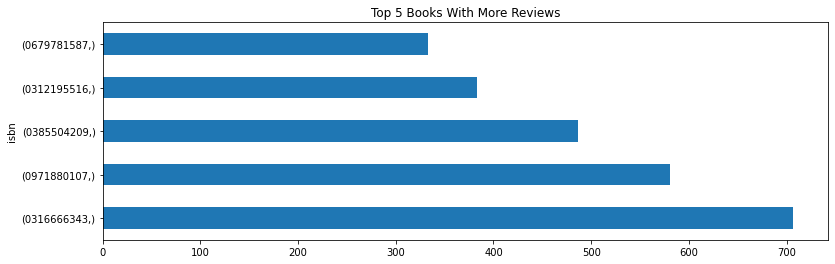

In [36]:
# top 5 books with more reviews
df_ratings.loc[mask1, ['isbn']].value_counts().head(5).plot(kind='barh', figsize=(13,4), title='top 5 books with more reviews'.title())

## 4. Clean The Data

### Pre-Cleaning

In [37]:
# Create cleaning data
df_books_clean = df_books.copy()
df_ratings_clean = df_ratings.copy()

In [38]:
# Validate isbn 10-character value (check if is mathematically valid)

#EXAMPLE: 
# ISBN: 0-7167-0344-0
# ("0" x 10) + ("7" x 9) + ("1" x 8) + ("6" x 7) + ("7" x 6) + ("0" x 5) + ("3" x 4) + ("4" x 3) + ("4" x 2) + ("0" x 1) =
# = 187 ----> 187 / 11 = 17 ... 0 (remainder). The remainder is 0, thus a valid 10 digit ISBN! 

#SPECIAL NOTE:
#Sometimes an “X” appears—and what it actually means is “10.” Here’s why:
#The ISBN has several parts which are all code for something. The final 
#digit is known as the “check digit” and it verifies the ISBN. Check digits 
#go from 0 to 10. In cases where the check digit would be 10, it appears as 
#an X. The X only appears in 10-digit ISBNs.
#Source: https://rachellegardner.com/isbn-10-isbn-13-and-those-pesky-x%E2%80%99s/

def validate_ten_digit_isbn(isbn):
  isbn_str = str(isbn)
  has_10_chars = len(isbn_str) == 10
  if not has_10_chars: return False
  first_9_chars_are_digit = all(str.isdigit(char) for char in isbn_str[:9])
  if not first_9_chars_are_digit: return False
  last_char_is_digit_or_X = str.isdigit(isbn_str[-1]) or isbn_str[-1] == 'X'
  if not last_char_is_digit_or_X: return False
  pos = 10
  sum = 0
  for char in isbn_str:
    if str.isdigit(char):
      sum += ( int(char) * pos )
    elif char == 'X':
      sum += ( 10 * pos )
    pos -= 1
  if sum % 11 == 0: return True # ISBN valid
  else: return False # ISBN invalid

#ISBN = isbn_values_clean.to_list()[0] # 0061009059
ISBN = '0061009059'
ISBN_X = '034538475X'
validate_ten_digit_isbn(ISBN_X)

True

### Cleaning ```df_books_clean```

In [39]:
df_books_clean.describe()

,isbn,title,author
count,271379,271379,271378
unique,271379,242154,102042
top,0195153448,Selected Poems,Agatha Christie
freq,1,27,632


In [40]:
# 4. Clean the data

# 4.1. Filter invalid ISBN

#BEFORE: df_books_clean.shape # (271379, 3)
mask_filter_invalid_isbn = df_books_clean.isbn.map(validate_ten_digit_isbn)
df_books_clean = df_books_clean[ mask_filter_invalid_isbn ]
#AFTER: (249040, 3)

df_books_clean.shape

(270850, 3)

In [41]:
# 4.2. Check for NA (not-available value) in ISBN

df_books_clean.isbn.isna().sum()

0

In [42]:
# 4.3. Check for NA (not-available value) in TITLE

df_books_clean.title.isna().sum()

0

In [43]:
# 4.4. Check for NA (not-available value) in AUTHOR

print(df_books_clean.author.isna().sum())

mask = df_books_clean.author.isna()
df_books_clean[ mask ]

1


,isbn,title,author
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN


In [44]:
# 4.5. Replace "&amp;" for "&" (ampersand)

df_books_clean['title'] = df_books_clean['title'].str.replace('&amp;', '&')
df_books_clean['author'] = df_books_clean['author'].str.replace('&amp;', '&')

#mask1 = df_books_clean['title'].str.contains('&')
#mask2 = df_books_clean['author'].str.contains('&', na=False) # #access all rows,, ignore NaN
#df_books_clean[ mask2 ]

In [45]:
# 4.6. Filter duplicated titles from same author
# !!! SINCE ISBN ARE ALL UNIQUE, THEY ARE DIFFERENT BOOKS, DESPITE BOOKS WITH EQUAL TITLE AND AUTHOR
# !!! THUS, WILL NOT FILTER DUPLICATED

#mask = ~df_books_clean.duplicated(subset=['title', 'author'])
#filtered = df_books_clean [mask]

#filtered[ filtered['author']=='Dan Brown' ]
#filtered.loc[ df_books_clean['author'] == 'Dan Brown', ['title', 'author'] ].value_counts()

In [46]:
# After cleaning the data, how many unique books, titles and authors?

print("{} unique books".format(df_books_clean.isbn.value_counts().count())) # 249040 unique books
print("{} unique titles".format(df_books_clean.title.value_counts().count())) # 223899 unique titles
print("{} unique authors".format(df_books_clean.author.value_counts().count())) # 96292 unique authors
print("TOTAL books in dataset: {}".format(df_books_clean.shape[0]))

270850 unique books
242021 unique titles
102000 unique authors
TOTAL books in dataset: 270850


### Cleaning ```df_ratings_clean```

In [47]:
# 4. Clean the data

# TIP: If you graph the dataset (optional), you will notice that most books are not rated frequently. 
#To ensure statistical significance, remove from the dataset users with less than 200 ratings 
#and books with less than 100 ratings.

# 4.1. Filter Users with < 200 ratings and Books with < 100 ratings

# 4.1.1. Filter Users with < 200 ratings

user_ratings_counts = df_ratings.groupby(by=['user'])['rating'].count().to_frame().sort_values(['rating'], ascending=False)
mask_users_more = user_ratings_counts['rating'] >= 200
user_ratings_counts_200 = user_ratings_counts[mask_users_more]
users_to_keep = user_ratings_counts_200.index.to_list()
mask = df_ratings['user'].isin(users_to_keep)
#BEFORE: df_ratings.shape # (1_149_780, 3)
df_ratings_clean = df_ratings[ mask ]
#AFTER: result_df.shape # (527556, 3)

# 4.1.2. Filter Books with < 100 ratings

book_ratings_counts = df_ratings.groupby(by=['isbn'])['rating'].count().to_frame().sort_values(['rating'], ascending=False)
mask_books_more = book_ratings_counts['rating'] >= 100
book_ratings_counts_100 = book_ratings_counts[mask_books_more]
books_to_keep = book_ratings_counts_100.index.to_list()
mask = df_ratings_clean['isbn'].isin(books_to_keep)
#BEFORE: df_ratings_clean.shape # (527556, 3)
df_ratings_clean = df_ratings_clean[ mask ]
#AFTER: (49781, 3)

df_ratings_clean.shape

(49781, 3)

In [48]:
# 4.2. Filter invalid ISBN

# dataset only has isbn values of 10 characters long
isbn_values_length = df_ratings_clean['isbn'].str.len().unique()[0] # array([10])
print("Dataset only has ISBN values of {length} characters long".format(length=isbn_values_length))
#isbn_values = df_ratings_clean['isbn']

# if dataset has any letter in any isbn value, then removes isbn row
# regex: \D means non-digit; \d{10} means 10 digits; [A-Za-z] means the alphabet
# ~ (tilde) means to invert all boolean values in a Series
#mask = ~(isbn_values.str.contains('\\D', regex=True))
#isbn_values_clean = isbn_values[ mask ]

#BEFORE: df_ratings_clean.shape # (49781, 3)
mask_filter_invalid_isbn = df_ratings_clean.isbn.map(validate_ten_digit_isbn)
df_ratings_clean = df_ratings_clean[ mask_filter_invalid_isbn ]
#AFTER: (44326, 3)

df_ratings_clean.shape

Dataset only has ISBN values of 10 characters long


(49781, 3)

In [49]:
# 4.3. Check for invalid USER

df_ratings_clean.user.isna().sum()

0

In [50]:
# 4.4. Check for invalid RATING

df_ratings_clean.rating.isna().sum()

0

In [51]:
# 4.5. Check for duplicated ratings

# repeated ratings with same user, book and rating
mask = df_ratings_clean.duplicated(subset=['user', 'isbn', 'rating']) # 0
count1 = df_ratings_clean[ mask ].value_counts().count()

# repeated ratings with same user and book
mask = df_ratings_clean.duplicated(subset=['user', 'isbn']) # 0
count2 = df_ratings_clean[ mask ].value_counts().count()

print("{} repeated ratings with the same user, book and rating".format(count1))
print("{} repeated ratings with the same user and book".format(count2))

0 repeated ratings with the same user, book and rating
0 repeated ratings with the same user and book


In [52]:
# After cleaning the data, how many unique users, books and ratings?

print("{} unique users".format(df_ratings_clean.user.value_counts().count())) # 888 unique users
print("{} unique books".format(df_ratings_clean.isbn.value_counts().count())) # 657 unique books
print("{} unique ratings".format(df_ratings_clean.rating.value_counts().count())) # 11 unique ratings (0-10)

888 unique users
731 unique books
11 unique ratings


### Getting An Unique And Cleaned Data Set

In [53]:
df1_books = df_books_clean.copy()
df2_ratings = df_ratings_clean.copy()

# set 'isbn' as index in ratings
df2_ratings = df2_ratings.set_index('isbn').sort_index(ascending=True)

# set 'isbn' as index in books as well, and conform this index to the ratings index
# ( let books index (bigger) adapt to/get absorbed by ratings index (shorter) )
df1_books = df1_books.set_index('isbn').reindex(df2_ratings.index).sort_index(ascending=True)

# add 'title' and 'author' columns
df_clean = df2_ratings.copy()
df_clean['title'] = df1_books['title']
df_clean['author'] = df1_books['author']

# reorder columns order
#cols = df_ratings_clean.columns.tolist()
#cols = ['user', 'rating', 'isbn']
#df_ratings_clean[cols]

In [54]:
# check for missing values (NaN)

print(df_clean.shape) # (44326, 4)

print('Missing values:')
print(df_clean.isna().sum())

#mask_missing_values = df_clean['author'].isna()
#df_clean[ mask_missing_values ]

(49781, 4)
Missing values:
user        0
rating      0
title     264
author    264
dtype: int64


In [55]:
# drop missing values (NaN)

df_clean = df_clean.dropna(axis='index', how='any')

print(df_clean.shape) # (44062, 4)

print('Missing values:')
print(df_clean.isna().sum())

(49517, 4)
Missing values:
user      0
rating    0
title     0
author    0
dtype: int64


In [56]:
# get rid of duplicated book titles --------------------- ????????????????????

#df_clean.drop_duplicates(subset=['title', 'author'])

#mask = df_clean.duplicated(subset=['title', 'author']) # .count() = 44062
#count1 = df_clean[ ~mask ] # .count()

### Aside Code

In [57]:
# Users and reviews

#mask2 = df_ratings['rating'] > 0

#users_with_more_reviews = df_ratings.loc[mask2, 'user'].value_counts() # the users who have given MORE reviews
#user_with_more_reviews = df_ratings.loc[mask2, 'user'].value_counts().head(1).index[0] # the USER who has given MORE reviews
#max_number_of_user_reviews = df_ratings.loc[mask2, 'user'].value_counts().max() # the MAX number of reviews given by users

#users_with_less_reviews = df_ratings.loc[mask2, 'user'].value_counts().to_frame().sort_values(['user'], ascending=True) # the users who have given LESS reviews
#user_with_less_reviews = df_ratings.loc[mask2, 'user'].value_counts().tail(1).index[0] # the USER who has given LESS reviews
#min_number_of_user_reviews = df_ratings.loc[mask2, 'user'].value_counts().min() # the MIN number of reviews given by users

In [58]:
# Books and reviews

#mask2 = df_ratings['rating'] > 0

#books_with_more_reviews = df_ratings.loc[mask2, 'isbn'].value_counts() # the books which have received MORE reviews
#book_with_more_reviews = df_ratings.loc[mask2, 'isbn'].value_counts().head(1).index[0] # the BOOK who has received MORE reviews
#max_number_of_book_reviews = df_ratings.loc[mask2, 'isbn'].value_counts().max() # the MAX number of reviews a book has received

#books_with_less_reviews = df_ratings.loc[mask2, 'isbn'].value_counts().to_frame().sort_values(['isbn'], ascending=True) # the books which have received LESS reviews
#df_ratings.loc[mask2, 'isbn'].value_counts().tail(1).index[0] # the BOOK who has received LESS reviews
#min_number_of_book_reviews = df_ratings.loc[mask2, 'isbn'].value_counts().min() # the MIN number of reviews a book has received

# Books with their total sum of ratings
#books_ratings_sum = df_ratings.loc[mask2].groupby(by=['isbn'], as_index=True)['rating'].sum().to_frame().sort_values(['rating'], ascending=False)
# Books with their total count of ratings
#books_ratings_count = df_ratings.loc[mask2].groupby(by=['isbn'], as_index=True)['rating'].count().to_frame().sort_values(['rating'], ascending=False)
#books_with_more_reviews_count = df_ratings.loc[mask2, ['isbn']].value_counts().to_frame() # the books which have received MORE reviews

# Books with their ratings average
#books_ratings_average = np.round(books_ratings_sum / books_ratings_count, 0)

# Books best rated (by rating and by number of ratings)
#books_ratings_average['count'] = books_ratings_count
#books_best_rated = books_ratings_average.sort_values(['rating', 'count'], ascending=False)
#books_best_rated.head(3)

In [59]:
#df_ratings['user'].value_counts().to_frame() #.plot(kind='bar', figsize=(13,4), title='')

## 5. Use K-Nearest Neighbors (KNN) Algorithm

### Auxiliar Functions

In [60]:
def get_book(isbn):
  mask = df_books_clean['isbn'] == isbn
  book = df_books_clean[ mask ]
  if book.shape[0] == 0: return False
  return book
#get_book('0061009059')

In [61]:
def get_book_values(isbn):
  book = get_book(isbn)
  if book is False: return False
  return book.values[0]
#get_book_values('0061009059')

In [62]:
def get_book_ratings(isbn):
  mask = df_ratings_clean['isbn'] == isbn
  book_ratings = df_ratings_clean[ mask ]
  if book_ratings.shape[0] == 0: return False
  return book_ratings
#get_book_ratings('0061009059')

In [63]:
def get_book_title(isbn):
  book = get_book(isbn)
  if book is False: return False
  return book['title'].values[0]
#get_book_title('0061009059')

In [64]:
def get_book_by_title(title, dataframe):
  mask = dataframe['title'] == title
  books = dataframe[ mask ]
  if books.shape[0] == 0: return False
  return books
#get_book_by_title('The Queen of the Damned (Vampire Chronicles (Paperback))', df_clean)

In [65]:
def get_isbn_by_book_title(title, dataframe):
  books = get_book_by_title(title, dataframe)
  if books.shape[0] == 0: return False
  return books.index.unique()[0]
#get_isbn_by_book_title('The Queen of the Damned (Vampire Chronicles (Paperback))', df_clean)

In [66]:
def get_user_ratings(user):
  mask = df_ratings_clean['user'] == user
  user_ratings = df_ratings_clean[ mask ]
  if user_ratings.shape[0] == 0: return False
  return user_ratings
#get_user_ratings(11676)

### Theory on K-Nearest Neighbors

In [67]:
#from scipy.sparse import csr_matrix
#from sklearn.neighbors import NearestNeighbors

# class sklearn.neighbors.NearestNeighbors(*, n_neighbors=5, radius=1.0, algorithm='auto', 
#leaf_size=30, metric='minkowski', p=2, metric_params=None, n_jobs=None)
# - Unsupervised learner for implementing neighbor searches.

# .kneighbors([X, n_neighbors, return_distance]) - Find the K-neighbors of a point.

# >>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# >>> nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
# >>> distances, indices = nbrs.kneighbors(X)


# NearestNeighbors implements unsupervised nearest neighbors learning. It acts as a uniform 
#interface to three different nearest neighbors algorithms: BallTree, KDTree, and a 
#brute-force algorithm based on routines in sklearn.metrics.pairwise. The choice of neighbors 
#search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 
#'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm 
#attempts to determine the best approach from the training data.

# "The classes in sklearn.neighbors can handle either NumPy arrays or scipy.sparse matrices 
#as input. For dense matrices, a large number of possible distance metrics are supported. 
#For sparse matrices, arbitrary Minkowski metrics are supported for searches.

# Supervised and unsupervised learning have one key difference. Supervised learning uses 
#labeled datasets, whereas unsupervised learning uses unlabeled datasets. By “labeled” we 
#mean that the data is already tagged with the right answer.

### K-Nearest Neighbors Model Implementation

#### K-NN Code Example 1

In [ ]:
#from sklearn.neighbors import NearestNeighbors

# Load the book data
titles = np.array(['Book A', 'Book B', 'Book C', 'Book D', 'Book E'])
features = [[1, 3, 5], [2, 4, 1], [3, 1, 2], [4, 2, 5], [5, 4, 3]]

# Define K value
K = 3

# Create the NearestNeighbors model
nn = NearestNeighbors(n_neighbors=K)

# Fit the model to the data
nn.fit(features)

# Choose a book to get recommendations for
book_index = 0

# Get the indices of the 3 nearest neighbors
distances, indices = nn.kneighbors([features[book_index]], return_distance=True)

# Print the recommendations
print("Top {K} Recommendations for '{book}':".format(K=K, book=titles[book_index]))
for i in range(len(distances.flat)):
  index = indices.flat[i]
  distance = distances.flat[i]
  title = titles[index]
  same_book_as_queried = titles[book_index] == titles[index]
  if not same_book_as_queried:
    print("- ['{title}', {distance}]".format(title=title, distance=distance))

Top 3 Recommendations for 'Book A':
- ['Book D', 3.1622776601683795]
- ['Book C', 4.123105625617661]


#### K-NN Code Example 2

In [ ]:
#import numpy as np
#from sklearn.neighbors import NearestNeighbors
samples = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]
neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
neigh.fit(samples)
#NearestNeighbors(...)
neigh.kneighbors([[0, 0, 1.3]], 2, return_distance=False)
#array([[2, 0]]...)
nbrs = neigh.radius_neighbors(
    [[0, 0, 1.3]], 0.4, return_distance=False
 )
np.asarray(nbrs[0][0])
#array(2)

array(2)

#### Quick Plot Peek

Top 10 Rating by user
0.0     36969
8.0      3110
10.0     2742
9.0      2558
7.0      1933
5.0      1026
6.0       810
4.0       169
3.0       106
2.0        48
Name: rating, dtype: int64


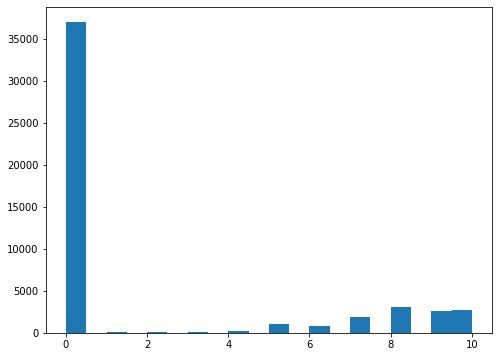

In [68]:
print("Top 10 Rating by user")
print(df_clean["rating"].value_counts().head(10))

#Total rating distribution
plt.figure(figsize=(8,6))
g = plt.hist(df_clean["rating"], bins=20)

#### 'Pivot' DataFrame And Convert To Scipy Sparse Matrix

In [91]:
# create dataframe of book features:
# - reshape dataframe (produce a 'pivot' table) to prepare our dataset
#and features, organized by given index (book isbn), column (user id) 
#and values (rating); and
# - fill any NA/NaN fields by defaulting to zero (0)
features = df_clean.reset_index().pivot(
    index='isbn',
    columns='user',
    values='rating').fillna(0)

INDEX_isbn = features.index.to_numpy()
#isbn = df_clean.index.unique()

COLUMNS_users = features.columns.to_numpy()
#users = df_clean['user'].sort_values(ascending=True).unique()

features

#features.columns # USER
#features.index # ISBN
#features.values # RATING

# EXAMPLE:
#features[COLUMN][INDEX] = VALUE
#features[USER][ISBN] = RATING
#features[254]['0142001740'] # = 9.0

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# ABOUT CSR MATRIX

#csr_matrix((data, indices, indptr), [shape=(M, N)])

#is the standard CSR representation where 
#the column indices for row i are stored in indices[indptr[i]:indptr[i+1]] 
#and their corresponding values are stored in data[indptr[i]:indptr[i+1]].

#If the shape parameter is not supplied, the matrix dimensions are inferred from the index arrays.

In [92]:
# convert dataframe of book features into scipy csr matrix
#(compressed sparse row matrix) 
matrix_book_features = csr_matrix(features.values)

indptr = matrix_book_features.indptr # 654 # index pointers, pointing to column indices and values for a specific row
indices = matrix_book_features.indices # 11200 # column indices for a specific row (if row=5, then indices[ indptr[5]:indptr[5+1] ])
data = matrix_book_features.data # 11200 # values for a specific row (if row=5, then data[ indptr[5]:indptr[5+1] ])

# ----- CSR MATRIX THEORY EXAMPLE -----
# for row=5:
# - the column indices are stored in indices[indptr[5]:indptr[5+1]] 
# - and their corresponding values are stored in data[indptr[5]:indptr[5+1]]
#index_pointer_for_row_5 = indptr[5] # 52
#index_pointer_for_row_5_up_to_6 = indptr[5+1] # 63
#column_indices_for_row_5 = indices[indptr[5]:indptr[5+1]] # array([ 25, 132, 181, 251, 297, 317, 377, 538, 615, 708, 738], dtype=int32)
#corresponding_values_for_row_5 = data[indptr[5]:indptr[5+1]] # array([10., 10., 10.,  6., 10.,  7.,  6., 10., 10.,  6., 10.], dtype=float32)

# ----- GET VALUE FROM CSR MATRIX -----
#ROW = (provided by programmer)
#INDPTR_ROW = indptr[ROW]
#INDPTR_ROW_PLUS_ONE = indptr[ROW+1]
#COLUMNS = (get from indices[INDPTR_ROW:INDPTR_ROW_PLUS_ONE])
#matrix_book_features.toarray()[ROW][COLUMNS] = VALUE
#matrix_book_features.toarray()[5][25] # Rating: 10.0

# ----- GET VALUE FROM FEATURES 'PIVOT' TABLE -----
#features[ COLUMNS_users[ indices[indptr[ROW]:indptr[ROW+1]][0] ] ][ INDEX_isbn[ROW] ]
#features[ COLUMNS_users[25] ][ INDEX_isbn[5] ]
#features[ User ][ Book ] = Rating
#features[ 11676 ][ '0060391626' ] # Rating: 10.0

matrix_book_features

<727x888 sparse matrix of type '<class 'numpy.float32'>'
	with 12548 stored elements in Compressed Sparse Row format>

In [93]:
# number of ratings each book received
book_count = pd.DataFrame(df_ratings_clean.groupby('isbn').size(), columns=['count'])
book_count.head(5)

,count
isbn,
002542730X,80
0060008032,49
0060096195,45
006016848X,54
0060173289,31


#### About K-NN

In [73]:
# Now we can discuss how we are pivoting into K-Nearest Neighbors(K-NN). 
#Why do you ask we did an array? 
# - For our book recommended we needed our data to be in an 'm x n' array. 
# - Our 'm' represents the number of books and 'n' represents our number of 
#users.
# - We had to reshape our DataFrame by pivot which allows setting 
#the book as rows and format our users as columns.
# - Since our rating distribution is 0-10 we will be calculating the 
#distances between our vectors. By doing this will need to perform linear 
#algebra.

# We will be using cosine similarity for our nearest neighbor search. 
#When a KNN helps us under the hood, it is relying on us to set up our 
#pivot and features to help predict books by calculating our distances 
#between similar user book recommendations, reason why dataset is sparse.

#### Implementation

In [ ]:
# 5. After importing and cleaning the data, use NearestNeighbors from sklearn.neighbors 
#to develop a model that shows books that are similar to a given book. The Nearest 
#Neighbors algorithm measures the distance to determine the “closeness” of instances.

In [94]:
# Get Book data
#features.columns # USER
#features.index # ISBN
#features.values # RATING

# EXAMPLE:
#features[COLUMN][INDEX] = VALUE
#features[USER][ISBN] = RATING
#features[254]['0142001740'] # = 9.0

isbns = pd.Series(features.index)
values = isbns.map(get_book_values)
values.name = 'values'
#titles = 
#authors = 

# Get Features
#indptr = matrix_book_features.indptr # INDPTR
#indices = matrix_book_features.indices # INDICES
#data = matrix_book_features.data # DATA

In [95]:
# Now that we have our sparse matrix complete and our DataFrame transformed, 
#we are ready to predict books.
# We will now need to implement our KNN model.

# Set K value
K = 5

# Create the NearestNeighbors model
knn = NearestNeighbors(
    metric='cosine', # 'cosine', ‘cityblock’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’
    algorithm='brute', # 'brute', 'kd_tree', 'ball_tree' or 'auto'
    n_neighbors=K,
    n_jobs=-1) # The number of parallel jobs to run for neighbors search. -1 means using all processors

#Note: fitting on sparse input will override the setting of this 
#parameter (algorithm), using brute force.

# Fit the model to the data
knn.fit(matrix_book_features)

knn
#sklearn.metrics.pairwise.cosine_distances

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

## 6. Create A Function Named ```get_recommends```

In [85]:
# 6. Create a function named get_recommends that takes a book title (from the dataset) 
#as an argument and returns a list of 5 similar books with their distances from the 
#book argument.

# Notice that the data returned from get_recommends() is a list. The first element in the
# list is the book title passed into the function. The second element in the list is a list 
#of five more lists. Each of the five lists contains a recommended book and the distance from 
#the recommended book to the book passed into the function.

# This code:
# get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")

# should return:
#[
#  'The Queen of the Damned (Vampire Chronicles (Paperback))',
#  [
#    ['Catch 22', 0.793983519077301], 
#    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479], 
#    ['Interview with the Vampire', 0.7345068454742432],
#    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
#    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
#  ]
#]

# function to return recommended books - this will be tested
#def get_recommends(book = ""):
#
#  recommended_books=''
#  return recommended_books

In [122]:
def get_recommends(book = ''):
  # Choose a book to get recommendations for
  title = book[:]
  book_isbn = get_isbn_by_book_title(title, df_clean)
  book_index = np.where( features.index.to_numpy() == book_isbn )[0][0]
  book_title = values[book_index][1]
  book_author = values[book_index][2]
  #values[book_index]
  
  X = matrix_book_features[book_index]
  #X.indptr # array([0, 9], dtype=int32)
  #X.indices # array([ 25, 398, 408, 511, 636, 805, 851, 854, 876], dtype=int32)
  #X.data # array([8., 8., 7., 8., 7., 7., 6., 8., 8.], dtype=float32)

  # Get the distances and indices of the K nearest neighbors
  distances, indices = knn.kneighbors(X=X, n_neighbors=K+1, return_distance=True)
  #distances.tolist() = [[5.960464477539063e-08, 0.5178412199020386, 0.5376338362693787, 0.7345068454742432, 0.7448656558990479, 0.793983519077301]]
  #indices = array([[136, 126, 152, 127, 151, 641]])

  # construct array of recommended books
  recommended_books = list()
  recommended_books.append(book_title)
  recommended_books.append([])
  for i in range( len(distances.tolist()[0]) ):
    rec_distance = distances.tolist()[0][i]
    rec_index = indices.flat[i]
    #rec_isbn = values[rec_index][0]
    rec_title = values[rec_index][1]
    #rec_author = values[rec_index][2]
    #recommended_books[1].append( [ rec_isbn, rec_title, rec_author, rec_distance ] )
    recommended_books[1].append( [ rec_title, rec_distance ] )

  # sort by recommended distance (descending)
  recommended_books[1].sort(reverse=True, key=lambda x: x[1])

  # pop (remove) first recommended book (the queried book itself)
  recommended_books[1].pop()

  return recommended_books

get_recommends('The Queen of the Damned (Vampire Chronicles (Paperback))')

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 [['Catch 22', 0.793983519077301],
  ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479],
  ['Interview with the Vampire', 0.7345068454742432],
  ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
   0.5376338362693787],
  ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]]]

In [ ]:
# Print top recommendations
book_index = 124
book_isbn = values[book_index][0]
book_title = values[book_index][1]
book_author = values[book_index][2]
X = matrix_book_features[book_index]
distances, indices = knn.kneighbors(X=X, n_neighbors=K+1, return_distance=True)
recommended_isbns = []
query = ""
print("Top {K} Recommendations for book '{book}' by {author} (ISBN: {isbn}):".format(K=K, book=book_title, author=book_author, isbn=book_isbn))
print("[ISBN,\tTITLE,\tAUTHOR,\tDISTANCE]")
for i in range( len(distances.flat) ):
  rec_distance = distances.flat[i]
  rec_index = indices.flat[i]
  rec_isbn = values[rec_index][0]
  rec_title = values[rec_index][1]
  rec_author = values[rec_index][2]

  book_already_recommended = rec_isbn in recommended_isbns
  same_book_as_queried = book_title == rec_title
  if not book_already_recommended and not same_book_as_queried:
    recommended_isbns.append(rec_isbn)
    print( "- [{isbn}, '{title}', '{author}', {distance}]".format(isbn=rec_isbn, title=rec_title, author=rec_author, distance=rec_distance) )
  
  if query:
    query += '\n'
  query += "[{isbn}, '{title}', '{author}', {distance}]".format(isbn=rec_isbn, title=rec_title, author=rec_author, distance=rec_distance)

print("\nComplete Query:")
print("[ISBN,\tTITLE,\tAUTHOR,\tDISTANCE]")
print(query)

Top 5 Recommendations for book 'The Beach House' by James Patterson (ISBN: 0316969680):
[ISBN,	TITLE,	AUTHOR,	DISTANCE]
- [0743206045, 'Daddy's Little Girl', 'Mary Higgins Clark', 0.7535590529441833]
- [1551668998, 'Beach House', 'Mary Alice Monroe', 0.798296332359314]
- [0399150897, 'Blow Fly: A Scarpetta Novel', 'Patricia Cornwell', 0.819351851940155]
- [0399149155, 'Q Is for Quarry', 'Sue Grafton', 0.8250288367271423]
- [0399149325, 'Portrait of a Killer: Jack the Ripper -- Case Closed', 'Patricia Cornwell', 0.8434885740280151]

Complete Query:
[ISBN,	TITLE,	AUTHOR,	DISTANCE]
[0316969680, 'The Beach House', 'James Patterson', 5.960464477539063e-08]
[0743206045, 'Daddy's Little Girl', 'Mary Higgins Clark', 0.7535590529441833]
[1551668998, 'Beach House', 'Mary Alice Monroe', 0.798296332359314]
[0399150897, 'Blow Fly: A Scarpetta Novel', 'Patricia Cornwell', 0.819351851940155]
[0399149155, 'Q Is for Quarry', 'Sue Grafton', 0.8250288367271423]
[0399149325, 'Portrait of a Killer: Jack th

In [86]:
# ... INSERT YOUR CODE ABOVE ...

## 7. Test Your Code

In [123]:
# 7. test your code

books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016210794448853], ['The Weight of Water', 0.7708583474159241], ['The Surgeon', 0.7699410915374756], ['I Know This Much Is True', 0.7677075266838074], ['The Lovely Bones: A Novel', 0.7234864234924316]]]
You passed the challenge! 🎉🎉🎉🎉🎉
